In [ ]:
#https://www.analyticsvidhya.com/blog/2022/02/optimal-resource-allocation-using-python/

# Python script for resource optimization using optimization libraries


In [1]:
import pandas as pd
import pulp as plp
import numpy as np

In [2]:
!pip install pulp

     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     --------------------------------------- 0.0/14.3 MB 262.6 kB/s eta 0:00:55
     --------------------------------------- 0.0/14.3 MB 245.8 kB/s eta 0:00:58
     --------------------------------------- 0.1/14.3 MB 416.7 kB/s eta 0:00:35
     --------------------------------------- 0.2/14.3 MB 748.1 kB/s eta 0:00:19
      -------------------------------------- 0.3/14.3 MB 923.9 kB/s eta 0:00:16
      --------------------------------------- 0.3/14.3 MB 1.0 MB/s eta 0:00:14
     - -------------------------------------- 0.4/14.3 MB 1.1 MB/s eta 0:00:13
     - -------------------------------------- 0.5/14.3 MB 1.2 MB/s eta 0:00:12
     - -------------------------------------- 0.6/14.3 MB 1.2 MB/s eta 0:00:12
     - -------------------------------------- 0.6/14.3 MB 1.2 MB/s e

In [2]:
df=pd.read_csv("mm8.csv")

In [3]:
df

,Date,Mine,Equipment,Material,Shift,Operator,Address,Hours_Worked,Target_TPH,Actual TPH
0,1/1/2023,Vasanth Coal Mine,Shovel1,Overburden,Day,Ramesh Patel,221B Baker street Mumbai,8,5000,4735
1,1/1/2023,Vasanth Coal Mine,Truck1,Coal,Day,Aditya,50Laxmi nagar hyd,8,800,725
2,1/2/2023,Reddy Coal Mine,Shovel1,Overburden,Night,Vijay Kumar,144 Golf club road Bangalore,8,5000,4210
3,1/2/2023,Reddy Coal Mine,Truck2,Coal,night,Priya Sharma,multiline delhi,8,800,855
4,1/5/2023,RP minerals,Dragline1,Overburden,Day,Rahul Jain,G-13 Govt Complex Jaipur,10,7000,6320
5,1/5/2023,RP minerals,Truck1,Coal,Day,Ankit Desai,B-302 Solaris Mulund West Mumbai,10,900,1050


In [7]:
location_df=df.iloc[:,[6,8]]

In [8]:
location_df

,Address,Target_TPH
0,221B Baker street Mumbai,5000
1,50Laxmi nagar hyd,800
2,144 Golf club road Bangalore,5000
3,multiline delhi,800
4,G-13 Govt Complex Jaipur,7000
5,B-302 Solaris Mulund West Mumbai,900


In [9]:
work_df=df.iloc[:,[2,9]]

In [10]:
work_df

,Equipment,Actual TPH
0,Shovel1,4735
1,Truck1,725
2,Shovel1,4210
3,Truck2,855
4,Dragline1,6320
5,Truck1,1050


In [11]:
model = plp.LpProblem("Resource_allocation_prob", plp.LpMinimize)

In [13]:
no_of_location = location_df.shape[0]
no_of_work = work_df.shape[0]
x_vars_list = []
for l in range(1,no_of_location+1):
    for w in range(1,no_of_work+1):
        temp = str(l)+str(w)
        x_vars_list.append(temp)
x_vars = plp.LpVariable.matrix("R", x_vars_list, cat = "Integer", lowBound = 0)
final_allocation = np.array(x_vars).reshape(6,6)
print(final_allocation)

[[R_11 R_12 R_13 R_14 R_15 R_16]
 [R_21 R_22 R_23 R_24 R_25 R_26]
 [R_31 R_32 R_33 R_34 R_35 R_36]
 [R_41 R_42 R_43 R_44 R_45 R_46]
 [R_51 R_52 R_53 R_54 R_55 R_56]
 [R_61 R_62 R_63 R_64 R_65 R_66]]


In [ ]:
#res_equation = plp.lpSum(final_allocation*resource_cost)
#model +=  res_equation

In [15]:
for l1 in range(no_of_location):
    model += plp.lpSum(final_allocation[l1][w1] for w1 in range(no_of_work)) <= location_df['Target_TPH'].tolist()[l1]
for w2 in range(no_of_work):
    model += plp.lpSum(final_allocation[l2][w2] for l2 in range(no_of_location)) >= work_df['Actual TPH'].tolist()[w2]

In [16]:
model

Resource_allocation_prob:
MINIMIZE
None
SUBJECT TO
_C1: R_11 + R_12 + R_13 + R_14 + R_15 + R_16 <= 5000

_C2: R_21 + R_22 + R_23 + R_24 + R_25 + R_26 <= 800

_C3: R_31 + R_32 + R_33 + R_34 + R_35 + R_36 <= 5000

_C4: R_41 + R_42 + R_43 + R_44 + R_45 + R_46 <= 800

_C5: R_51 + R_52 + R_53 + R_54 + R_55 + R_56 <= 7000

_C6: R_61 + R_62 + R_63 + R_64 + R_65 + R_66 <= 900

_C7: R_11 + R_21 + R_31 + R_41 + R_51 + R_61 >= 4735

_C8: R_12 + R_22 + R_32 + R_42 + R_52 + R_62 >= 725

_C9: R_13 + R_23 + R_33 + R_43 + R_53 + R_63 >= 4210

_C10: R_14 + R_24 + R_34 + R_44 + R_54 + R_64 >= 855

_C11: R_15 + R_25 + R_35 + R_45 + R_55 + R_65 >= 6320

_C12: R_16 + R_26 + R_36 + R_46 + R_56 + R_66 >= 1050

VARIABLES
0 <= R_11 Integer
0 <= R_12 Integer
0 <= R_13 Integer
0 <= R_14 Integer
0 <= R_15 Integer
0 <= R_16 Integer
0 <= R_21 Integer
0 <= R_22 Integer
0 <= R_23 Integer
0 <= R_24 Integer
0 <= R_25 Integer
0 <= R_26 Integer
0 <= R_31 Integer
0 <= R_32 Integer
0 <= R_33 Integer
0 <= R_34 Integer
0 <= 

In [17]:
model.solve()
status = plp.LpStatus[model.status]
print(status)

Optimal


In [ ]:
#print("Optimal overall resouce cost: ",str(plp.value(model.objective)))
#for each in model.variables():
 #   print("Optimal cost of ", each, ": "+str(each.value()))


# Git for version control of the optimization tool

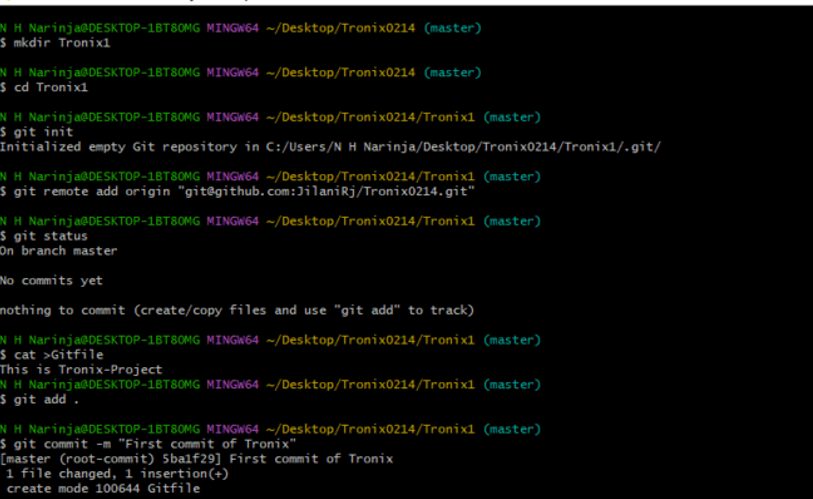

In [18]:
!pip install scipy

In [19]:
from scipy.optimize import minimize

# Objective function to minimize
def objective_function(x):
    # In this example, the objective function is a simple quadratic function
    return x[0]**2 + 4 * x[1]**2

# Constraint function
def constraint(x):
    # In this example, there is a simple linear constraint
    return x[0] + x[1] - 1

# Initial guess
initial_guess = [0.5, 0.5]

# Define bounds for variables
bounds = [(0, None), (0, None)]  # Non-negativity constraint for both variables

# Define constraints
constraints = ({'type': 'eq', 'fun': constraint})

# Use the minimize function to find the optimal solution
result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the result
print("Optimal solution:")
print("x =", result.x)
print("Optimal value =", result.fun)


Optimal solution:
x = [0.8 0.2]
Optimal value = 0.8000000000000003
